In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/ames_raw.csv')

In [5]:
df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
del df['Unnamed: 0']
del df['Order']

In [7]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# need better naming conventions for these
price_tiers = ['Low', 'Middle', 'High']
quantiles = df['SalePrice'].quantile([.1, .25, .5, .75, .9])
print(quantiles)
#price_values = [df['Sale']]
df['SalePrice'].min()
price_conditions = [
    df['SalePrice'] < df['SalePrice'].quantile(.25),
    (df['SalePrice'] >= df['SalePrice'].quantile(.25)) & (df['SalePrice'] <= df['SalePrice'].quantile(.75)),
    df['SalePrice'] > df['SalePrice'].quantile(.75)
]
df['sale_price_tier'] = np.select(price_conditions, price_tiers)

0.10    105450.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
0.90    281241.7
Name: SalePrice, dtype: float64


In [9]:
df['sale_price_per_sq_ft'] = round(df['SalePrice'] / df['Gr Liv Area'], 2)

In [10]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
season_month = [
    df['Mo Sold'].isin([12, 1, 2]),
    df['Mo Sold'].isin([3, 4, 5]),
    df['Mo Sold'].isin([6 , 7, 8]),
    df['Mo Sold'].isin([9, 10, 11])
]
df['season_sold'] = np.select(season_month, seasons)

In [11]:
remodeled_house = (df['Year Remod/Add'] - df['Year Built'] > 2)
df['is_remodeled'] = remodeled_house

In [12]:
recently_remodeled = (df['Yr Sold'] - df['Year Remod/Add'] < 3)
df['recently_remodeled'] = recently_remodeled

In [13]:
df[df['recently_remodeled'] == True].groupby('sale_price_tier').size()

sale_price_tier
High      296
Low        34
Middle    208
dtype: int64

In [15]:
home_eras = ['Pre-50s', '50s', '60s', '70s', '80s', '90s', '2000s']
home_years = [
    df['Year Built'] < 1950,
    (df['Year Built'] >= 1950) & (df['Year Built'] < 1959),
    (df['Year Built'] >= 1960) & (df['Year Built'] < 1969),
    (df['Year Built'] >= 1970) & (df['Year Built'] < 1979),
    (df['Year Built'] >= 1980) & (df['Year Built'] < 1989),
    (df['Year Built'] >= 1990) & (df['Year Built'] < 1999),
    (df['Year Built'] >= 2000)
]
df['era_home_built'] = np.select(home_years, home_eras)

In [21]:
df.groupby(['Neighborhood']).size()

Neighborhood
Blmngtn     28
Blueste     10
BrDale      30
BrkSide    108
ClearCr     44
CollgCr    267
Crawfor    103
Edwards    194
Gilbert    165
Greens       8
GrnHill      2
IDOTRR      93
Landmrk      1
MeadowV     37
Mitchel    114
NAmes      443
NPkVill     23
NWAmes     131
NoRidge     71
NridgHt    166
OldTown    239
SWISU       48
Sawyer     151
SawyerW    125
Somerst    182
StoneBr     51
Timber      72
Veenker     24
dtype: int64

In [23]:
df.groupby(['season_sold']).size()

season_sold
Fall       477
Spring     906
Summer    1187
Winter     360
dtype: int64

In [24]:
df.groupby(['Neighborhood', 'season_sold']).size()

Neighborhood  season_sold
Blmngtn       Fall            7
              Spring         13
              Summer          6
              Winter          2
Blueste       Fall            1
                             ..
Timber        Winter         14
Veenker       Fall            1
              Spring          8
              Summer         11
              Winter          4
Length: 106, dtype: int64

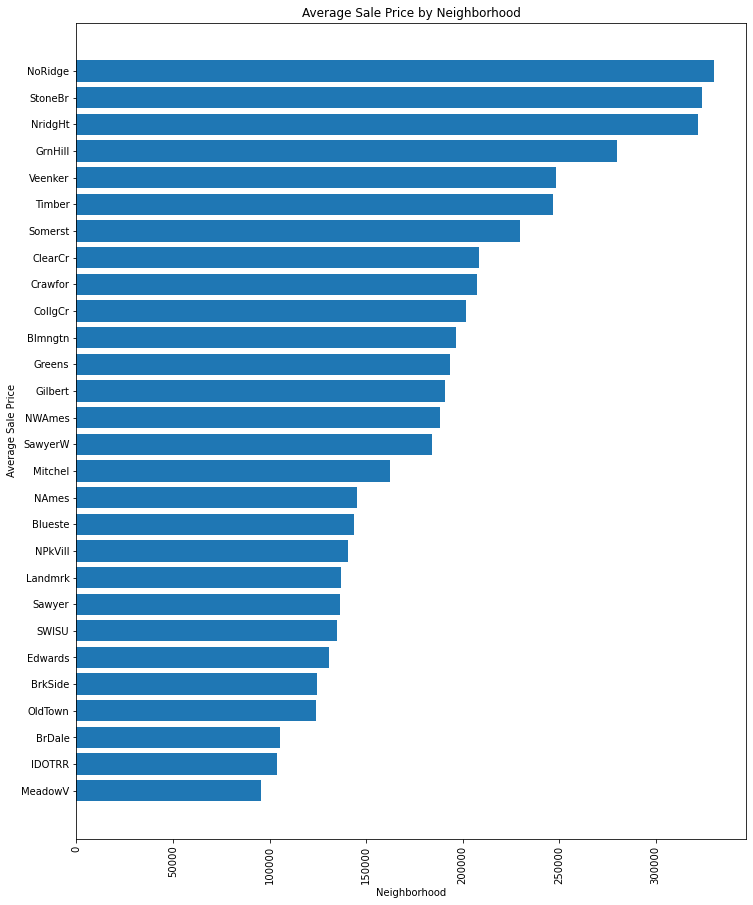

In [74]:
mean_price = df.groupby(['Neighborhood'])['SalePrice'].mean().reset_index(name='Average Sale Price').sort_values(by='Average Sale Price', ascending=True)
plt.figure(figsize=(12, 15))
plt.barh(mean_price['Neighborhood'], mean_price['Average Sale Price'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.show()

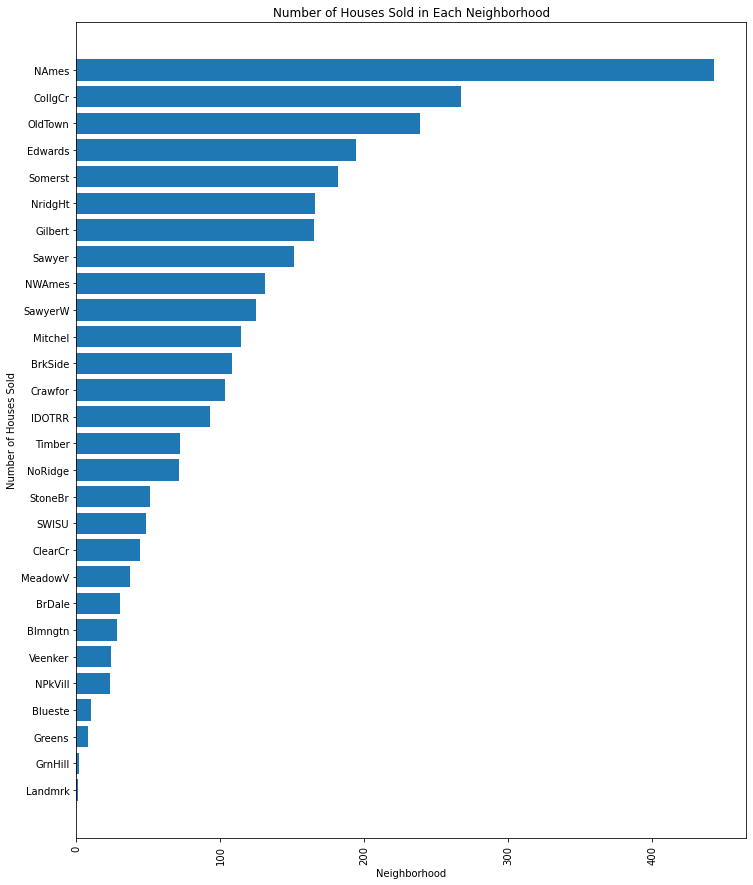

In [72]:
houses_sold = df.groupby(['Neighborhood']).size().reset_index(name='Number of Houses Sold').sort_values(by='Number of Houses Sold', ascending=True)
plt.figure(figsize=(12, 15))
plt.barh(houses_sold['Neighborhood'], houses_sold['Number of Houses Sold'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold in Each Neighborhood')
plt.show()

Text(0.5, 1.0, 'Average Square Feet by Neighborhood')

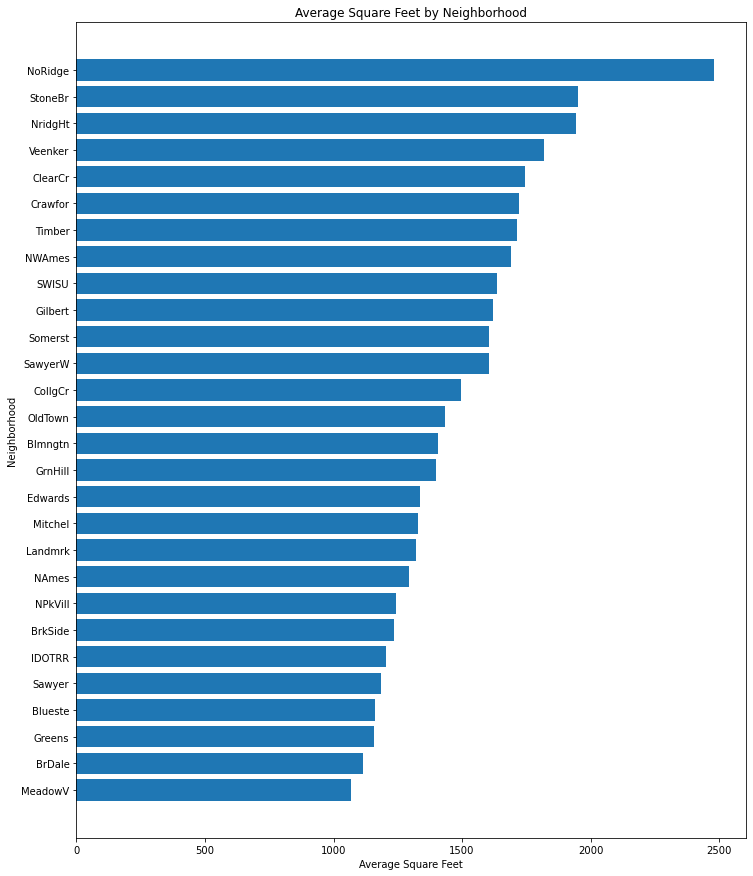

In [68]:
average_house_size = df.groupby(['Neighborhood'])['Gr Liv Area'].mean().reset_index(name='Average SQ Ft.').sort_values(by='Average SQ Ft.', ascending=True)
plt.figure(figsize=(12, 15))
plt.barh(average_house_size['Neighborhood'], average_house_size['Average SQ Ft.'])
#plt.xticks(rotation=90)
plt.ylabel('Neighborhood')
plt.xlabel('Average Square Feet')
plt.title('Average Square Feet by Neighborhood')

Text(0.5, 1.0, 'Average Square Feet by Neighborhood')

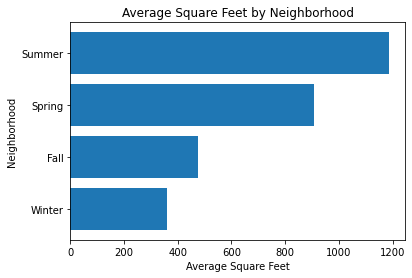

In [80]:
seasons_sold = df.groupby(['season_sold']).size().reset_index(name='Number of Houses Sold').sort_values(by='Number of Houses Sold', ascending=True)
plt.barh(seasons_sold['season_sold'], seasons_sold['Number of Houses Sold'])
#plt.xticks(rotation=90)
plt.ylabel('Season')
plt.xlabel('Number of Houses Sold')
plt.title('Houses Sold each Season')
#plt.xticks(rotation=90)
plt.ylabel('Neighborhood')
plt.xlabel('Average Square Feet')
plt.title('Average Square Feet by Neighborhood')

In [77]:
seasons_sold

,season_sold,Number of Houses Sold
0,Fall,477
1,Spring,906
2,Summer,1187
3,Winter,360
